# Topic Modeling

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
headlines = pd.read_csv('abcnews-date-text.csv',
                        parse_dates=[0], infer_datetime_format=True)
headlines.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6564\658128108.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  headlines = pd.read_csv('abcnews-date-text.csv',


publish_date                                      headline_text
0   2003-02-19  aba decides against community broadcasting lic...
1   2003-02-19     act fire witnesses must be aware of defamation
2   2003-02-19     a g calls for infrastructure protection summit
3   2003-02-19           air nz staff in aust strike for pay rise
4   2003-02-19      air nz strike to affect australian travellers

# Explonatory Data Analysis
## Find Distribution of each day, month, and year

Text(0.5, 1.0, 'Distributon of number of words in the headlines')

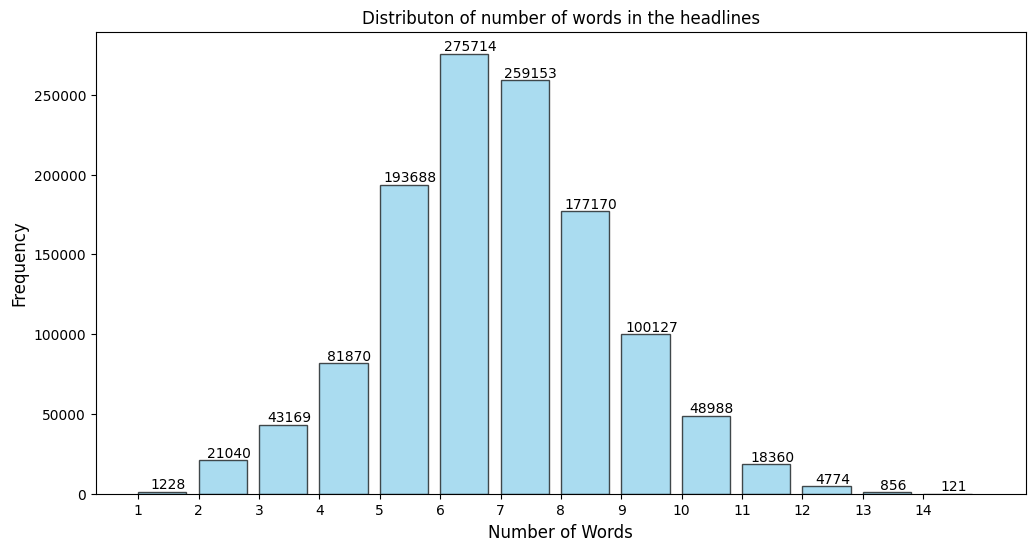

In [2]:
headlines['NumWords'] = headlines['headline_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))

hist, bins, _ = plt.hist(headlines['NumWords'], bins=14, color='skyblue', edgecolor='black', alpha=0.7, width=0.8)
for i in range(len(bins)-1):
    plt.text(bins[i] + 0.5*(bins[i+1] - bins[i]), hist[i], str(int(hist[i])), ha='center', va='bottom')
    
# Set custom x-ticks for each bin
plt.xticks(bins[:-1], [str(i) for i in range(1, len(bins))])

plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distributon of number of words in the headlines")

# headlines['NumWords'].value_counts().sort_index()

Text(0.5, 1.0, 'Distributon of number of headlines across years')

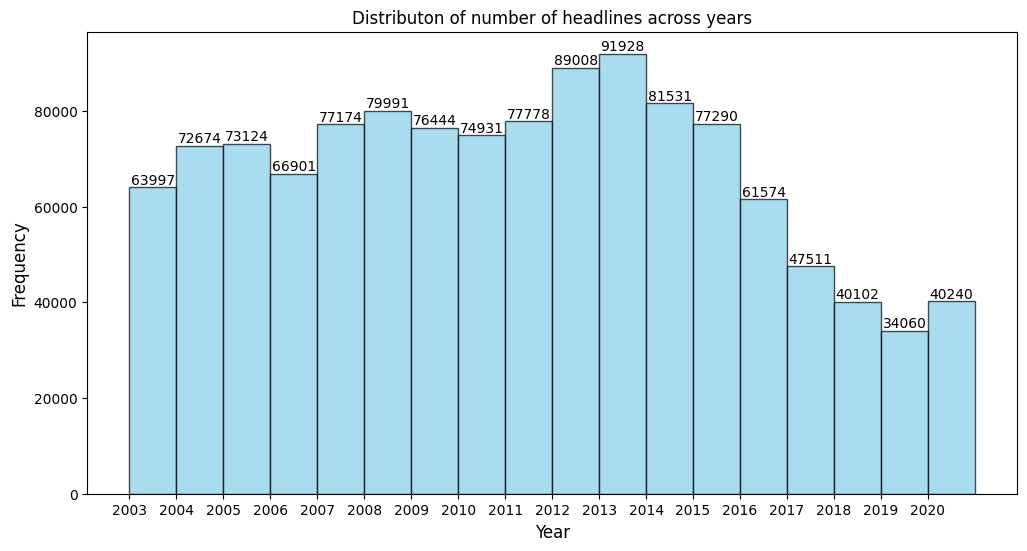

In [3]:
headlines['year'] = pd.DatetimeIndex(headlines['publish_date']).year
# headlines[['year']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);


plt.figure(figsize=(12,6))

hist, bins, _ = plt.hist(headlines['year'], bins=18, color='skyblue', edgecolor='black', alpha=0.7)
for i in range(len(bins)-1):
    plt.text(bins[i] + 0.5*(bins[i+1] - bins[i]), hist[i], str(int(hist[i])), ha='center', va='bottom')

# Set custom x-ticks for each bin

plt.xticks(bins[:-1], [str(i) for i in range(2003, 2021)])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distributon of number of headlines across years")

# headlines['year'].value_counts().sort_index()

month
1      89841
2      95794
3     108615
4     101917
5     108580
6     103653
7     107046
8     109243
9      98907
10    104632
11    103886
12     94144
Name: count, dtype: int64

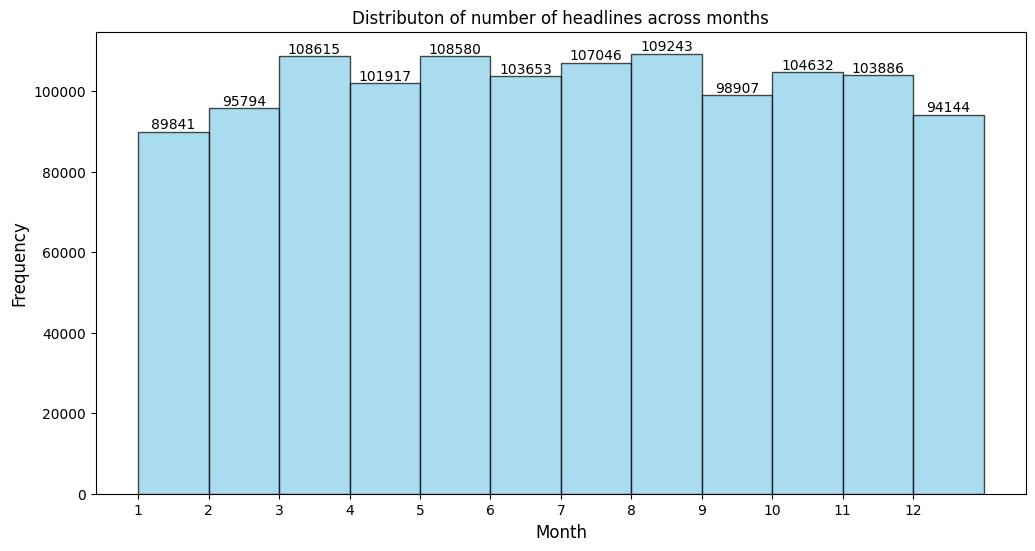

In [4]:
headlines['month'] = pd.DatetimeIndex(headlines['publish_date']).month
# headlines[['month']].hist(figsize=(12, 6), bins=12, xlabelsize=8, ylabelsize=8);

plt.figure(figsize=(12,6))

hist, bins, _ = plt.hist(headlines['month'], bins=12, color='skyblue', edgecolor='black', alpha=0.7)
for i in range(len(bins)-1):
    plt.text(bins[i] + 0.5*(bins[i+1] - bins[i]), hist[i], str(int(hist[i])), ha='center', va='bottom')

plt.xticks(bins[:-1], [str(i) for i in range(1,13)])

plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distributon of number of headlines across months")

headlines['month'].value_counts().sort_index()

day
1     39334
2     39398
3     39709
4     39972
5     39870
6     39550
7     40623
8     40626
9     40054
10    40643
11    40730
12    40386
13    40448
14    40771
15    41241
16    40944
17    41022
18    40856
19    40990
20    41032
21    41122
22    41303
23    41091
24    40554
25    38483
26    38945
27    39902
28    39702
29    37303
30    36830
31    22824
Name: count, dtype: int64

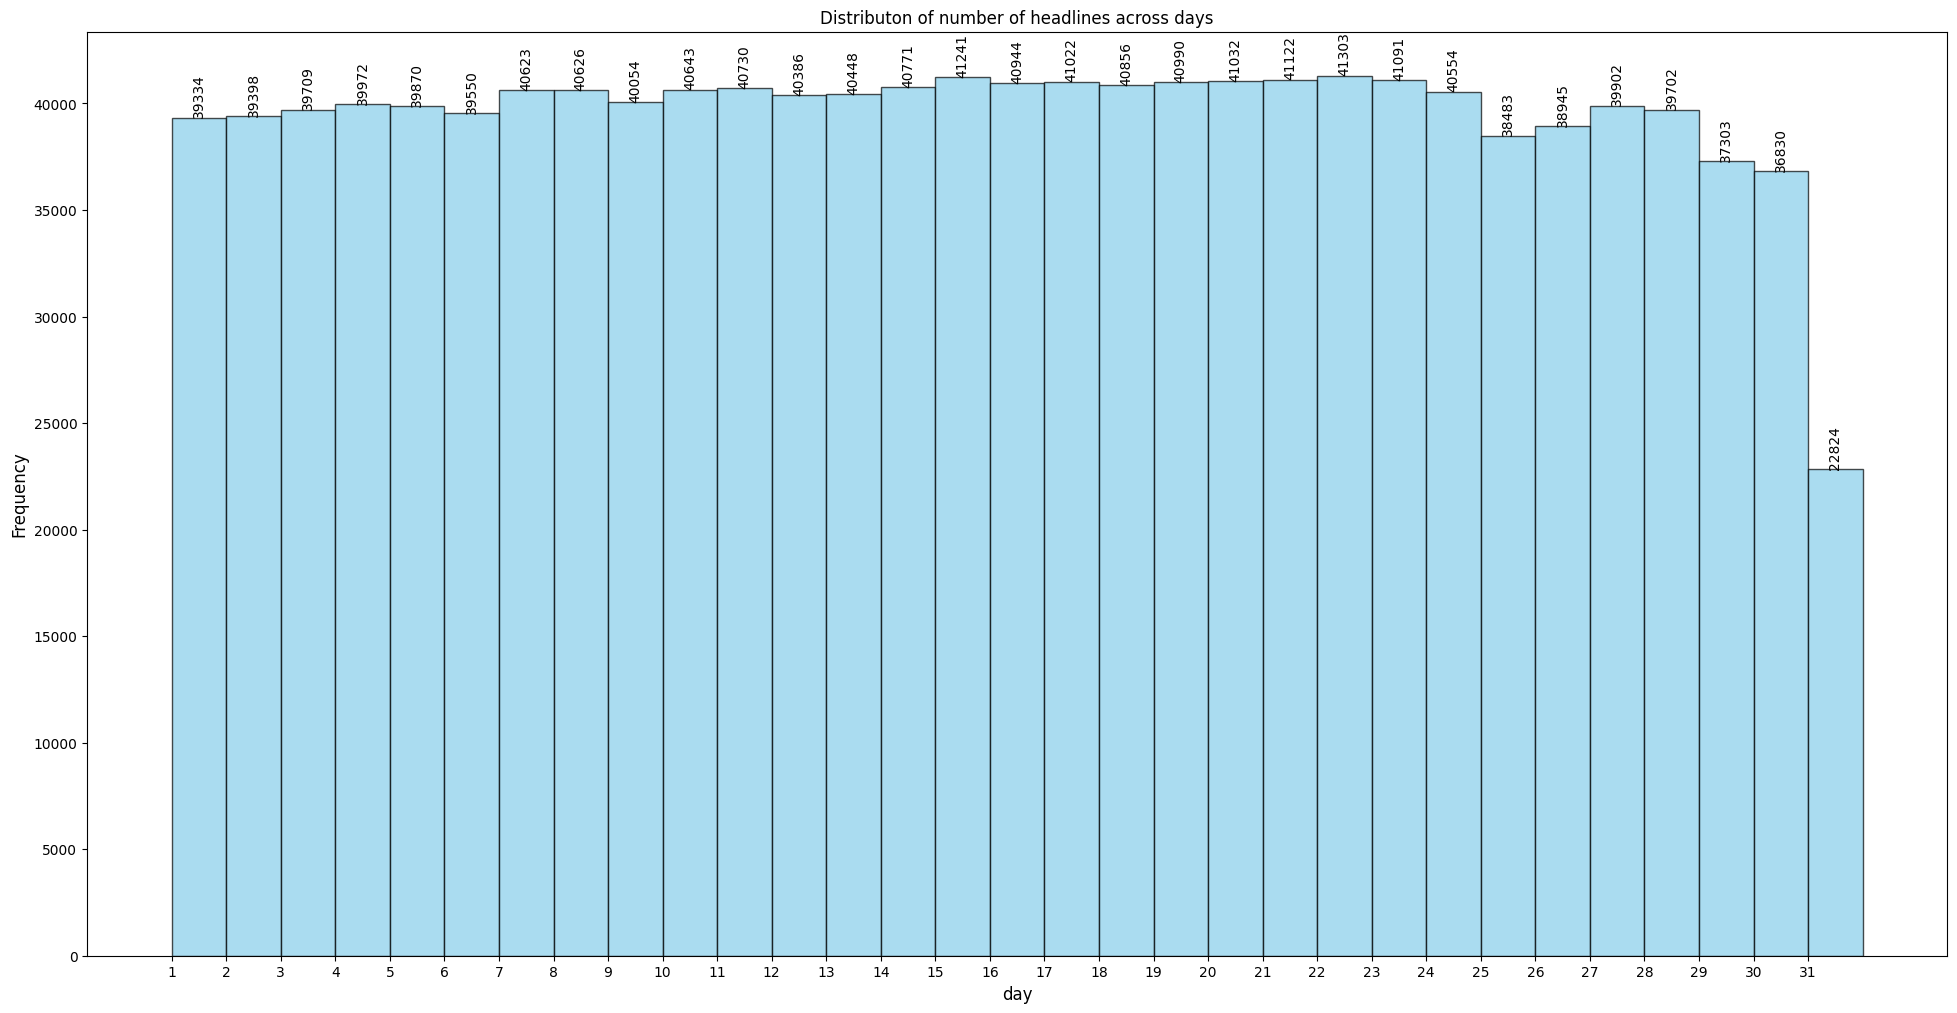

In [5]:
headlines['day'] = pd.DatetimeIndex(headlines['publish_date']).day
# headlines[['day']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);

plt.figure(figsize=(24,12))

hist, bins, _ = plt.hist(headlines['day'], bins=31, color='skyblue', edgecolor='black', alpha=0.7)
for i in range(len(bins)-1):
    plt.text(bins[i] + 0.5*(bins[i+1] - bins[i]), hist[i], str(int(hist[i])), ha='center', va='bottom',rotation=90)

plt.xticks(bins[:-1], [str(i) for i in range(1,32)])

plt.xlabel('day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distributon of number of headlines across days")

headlines['day'].value_counts().sort_index()

# have 1226258 row

## Create time series charts for daily, monthly, and yearly

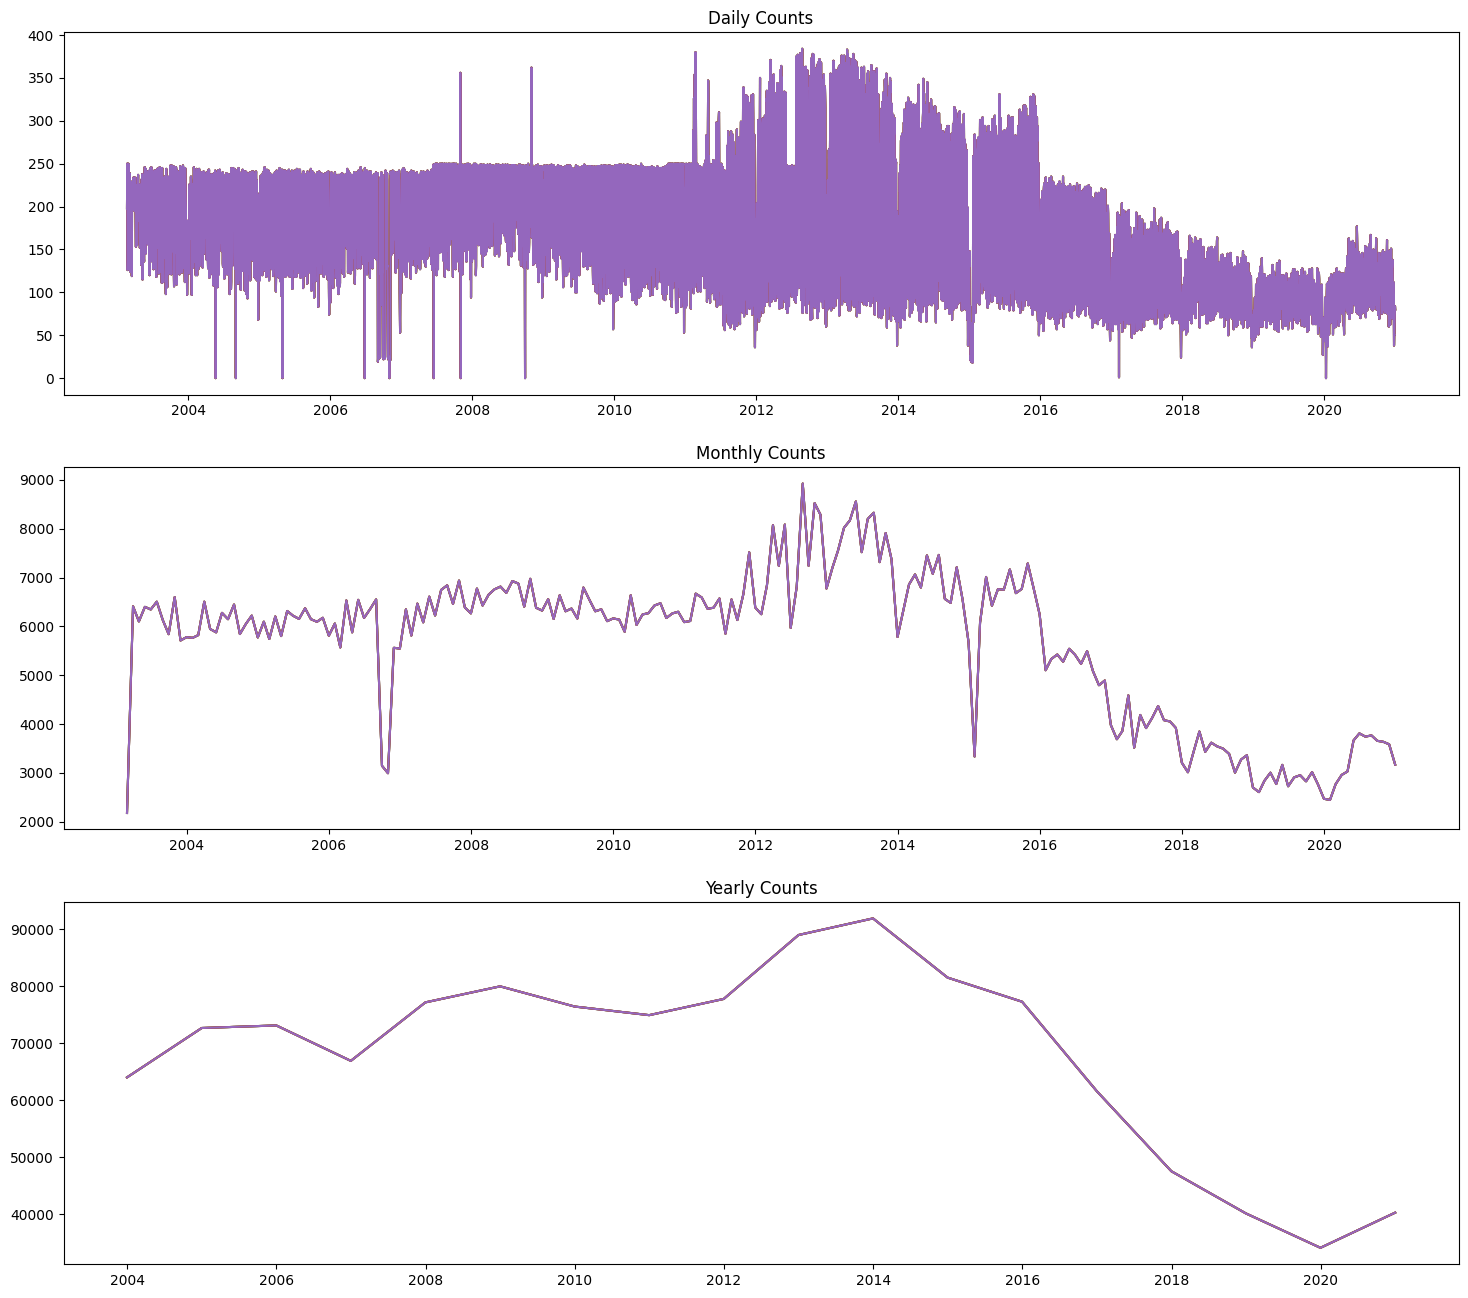

              headline_text  NumWords   year  month    day
publish_date                                              
2003-12-31            63997     63997  63997  63997  63997
2004-12-31            72674     72674  72674  72674  72674
2005-12-31            73124     73124  73124  73124  73124
2006-12-31            66901     66901  66901  66901  66901
2007-12-31            77174     77174  77174  77174  77174
2008-12-31            79991     79991  79991  79991  79991
2009-12-31            76444     76444  76444  76444  76444
2010-12-31            74931     74931  74931  74931  74931
2011-12-31            77778     77778  77778  77778  77778
2012-12-31            89008     89008  89008  89008  89008
2013-12-31            91928     91928  91928  91928  91928
2014-12-31            81531     81531  81531  81531  81531
2015-12-31            77290     77290  77290  77290  77290
2016-12-31            61574     61574  61574  61574  61574
2017-12-31            47511     47511  47511  47511  475

In [6]:
headlines['publish_date'] = pd.to_datetime(headlines['publish_date'])
headlines = pd.DataFrame(headlines).set_index('publish_date') 

monthly_counts = headlines.resample('M').count()
yearly_counts = headlines.resample('A').count()
daily_counts = headlines.resample('D').count()
fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
ax[2].plot(yearly_counts);
ax[2].set_title('Yearly Counts');
plt.show()
print(yearly_counts)

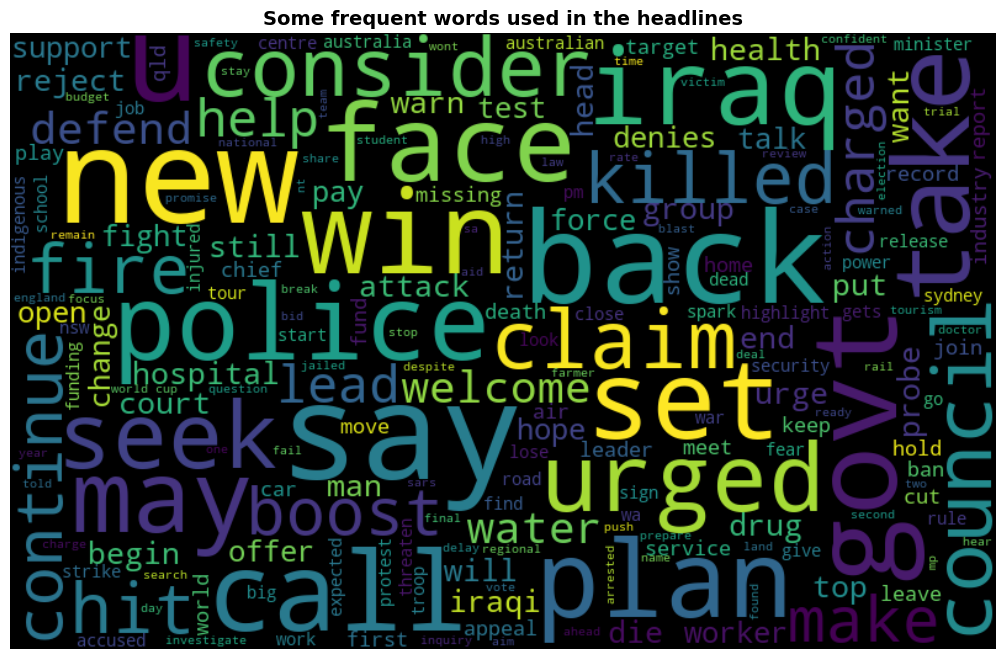

In [7]:
from wordcloud import WordCloud
all_words = ''.join([word for word in headlines['headline_text'][0:100000]]) # [0:100000] removed
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Some frequent words used in the headlines", weight='bold', fontsize=14)
plt.show()

In [8]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
  normalized_texts = ''
  lower = texts.lower()
  no_punctuation = NON_ALPHANUM.sub(r' ', lower)
  no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
  return no_non_ascii
  
headlines['headline_text'] = headlines['headline_text'].apply(normalize_texts)
headlines.head()
headlines['headline_text'] = headlines['headline_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

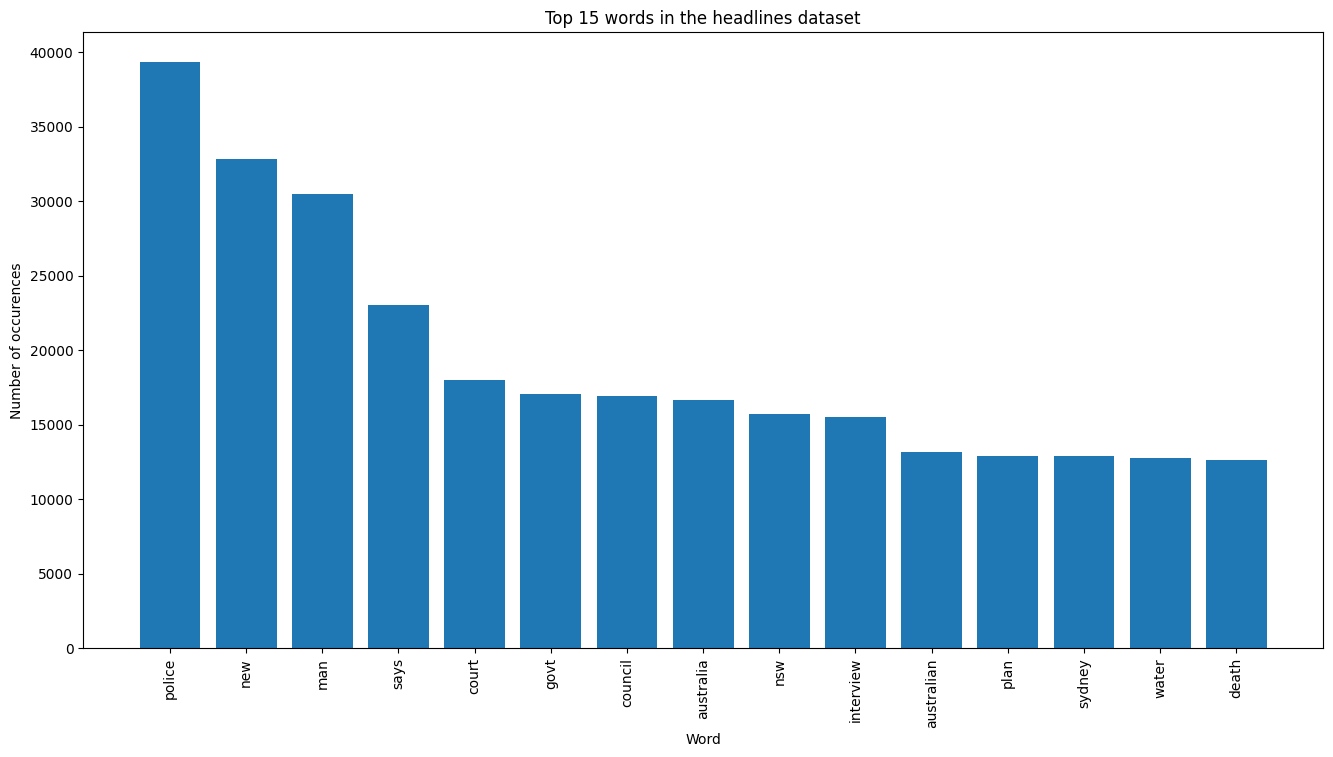

In [9]:
def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
words = []
word_values = []
for i,j in get_top_n_words(headlines['headline_text'],15):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 15 words in the headlines dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Method 1: Clustering using ‘wordtovec’ embeddings

In [10]:
#!pip install --upgrade gensim
#importing wordtovec embeddings 
from gensim.models import KeyedVectors
# pretrained_embeddings_path = "./GoogleNews-vectors-negative300.bin.gz"
pretrained_embeddings_path = "GoogleNews-vectors-negative300.bin"
word2vec = KeyedVectors.load_word2vec_format(pretrained_embeddings_path, binary=True)

C:\Users\Lenovo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


This code loads pre-trained word embeddings from a file and demonstrates how to access the word embedding vector for a specific word ('iraq') using the KeyedVectors class provided by the Gensim library.

In [11]:
word = 'iraq'
print('Word: {}'.format(word))
print('First 20 values of embedding:\n{}'.format(word2vec[word][:20]))

Word: iraq
First 20 values of embedding:
[-0.27539062  0.13574219 -0.15332031  0.11962891 -0.25585938  0.00793457
  0.04638672 -0.35546875 -0.11474609  0.32617188  0.05859375 -0.33203125
 -0.36914062  0.04321289  0.25585938  0.18261719 -0.15527344 -0.171875
 -0.11230469 -0.20507812]


These lines below demonstrate how to use pre-trained word embeddings to find words that are most similar to specific relationships between words, such as finding the word that is to 'woman' as 'king' is but not a 'man' or finding words similar to 'Tennis' given the relationship with 'Ronaldo' but not 'Soccer'.

In [12]:
print(word2vec.most_similar(positive=['woman', 'king'], negative=['man'], topn=3))
print(word2vec.most_similar(positive=['Tennis', 'Ronaldo'], negative=['Soccer'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]
[('Nadal', 0.6514425277709961), ('Safin', 0.6181676983833313), ('Federer', 0.6156209111213684)]


In [13]:
news = headlines.sample(frac = 0.02, random_state= 423)

class WordVecVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = 300
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for texts in X
        ])
#representing each headline by the mean of word embeddings for the words used in the headlines.
wtv_vect = WordVecVectorizer(word2vec)
X_train_wtv = wtv_vect.transform(news['headline_text'])
print(X_train_wtv.shape)

(24525, 300)


This code performs KMeans clustering on the training data (X_train_wtv) and assigns each headline to one of the identified clusters, creating a DataFrame with the headlines and their respective cluster labels.

In [14]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train_wtv)
df = pd.DataFrame({'headlines' :news['headline_text'], 'topic_cluster' :y_km })
df

headlines  topic_cluster
publish_date                                                                  
2016-09-27    colombian marxist rebels sign peace deal endin...              6
2013-04-11                  darwin harbour safe for bush tucker              7
2011-01-09             nsw beach evacuated after shark sighting              1
2011-09-25                 abduction alert after baby kidnapped              3
2007-11-25                       jets mariners share the spoils              2
...                                                         ...            ...
2014-05-01            clarke reacts icc test ranking number one              2
2014-06-10                     future uncertain for psg workers              4
2012-11-07                   canning basin gas agreement signed              4
2016-10-23    cheika furious over try ruling all blacks crus...              2
2016-04-19     australias rio olympics uniforms revealed sydney              7

[24525 rows x 2 columns]

# Method 2: Clustering using LDA ( Latent Dirichlet Analysis)

In [15]:
news = headlines.sample(frac = 0.02, random_state= 423)

This code performs LDA topic modeling on the headline text data, generating a matrix of topic distributions for each document.

In [16]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
news_matrix = tf_vectorizer.fit_transform(news['headline_text'])
#importing LDA
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
#Fitting LDA
lda = LatentDirichletAllocation(n_components=8, learning_method='online', 
                                          random_state=0, verbose=0, n_jobs = -1)
lda_model = lda.fit(news_matrix)
lda_matrix = lda_model.transform(news_matrix)
lda_matrix

array([[0.03163136, 0.03163501, 0.03163135, ..., 0.03163135, 0.77855908,
        0.03163135],
       [0.03886553, 0.72798844, 0.03885767, ..., 0.03885767, 0.03885767,
        0.03885767],
       [0.72696425, 0.03901034, 0.03900423, ..., 0.03900423, 0.03900423,
        0.03900423],
       ...,
       [0.20456004, 0.40459406, 0.03892413, ..., 0.03900499, 0.03892413,
        0.03892413],
       [0.03439356, 0.23487894, 0.03439356, ..., 0.03439356, 0.03439356,
        0.34578171],
       [0.03668945, 0.51360219, 0.03669713, ..., 0.15439328, 0.14847203,
        0.03676701]])

It prints a header indicating that the topics are found via LDA, and calls the print_topics function to print the top words for each topic.

In [17]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, news_matrix, 15)

Topics found via LDA:

Topic #0:
coast nsw dead hit gold residents continues government hill driver review study tourism land bus

Topic #1:
australia interview council health school set new funding minister queensland road record south final dies

Topic #2:
police govt plan death court man election accused murder missing woman house claims trial budget

Topic #3:
world cup day rise adelaide fears opposition ban test future life campaign new rates calls

Topic #4:
talks country hour trump bid action tas denies ahead live end hold crisis festival toll

Topic #5:
crash charged car man north drug group says workers guilty act urges pay fatal case

Topic #6:
hospital abc china urged open high farmers canberra help new arrested probe deal plans business

Topic #7:
water report rural killed home win national melbourne attack power union mayor australian backs market


This code segment visualizes the headlines clustered among their topics in a 2D space using t-SNE.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 24525 samples in 0.165s...
[t-SNE] Computed neighbors for 24525 samples in 7.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24525
[t-SNE] Computed conditional probabilities for sample 2000 / 24525
[t-SNE] Computed conditional probabilities for sample 3000 / 24525
[t-SNE] Computed conditional probabilities for sample 4000 / 24525
[t-SNE] Computed conditional probabilities for sample 5000 / 24525
[t-SNE] Computed conditional probabilities for sample 6000 / 24525
[t-SNE] Computed conditional probabilities for sample 7000 / 24525
[t-SNE] Computed conditional probabilities for sample 8000 / 24525
[t-SNE] Computed conditional probabilities for sample 9000 / 24525
[t-SNE] Computed conditional probabilities for sample 10000 / 24525
[t-SNE] Computed conditional probabilities for sample 11000 / 24525
[t-SNE] Computed conditional probabilities for sample 12000 / 24525
[t-SNE] Computed conditional probabilities for sa

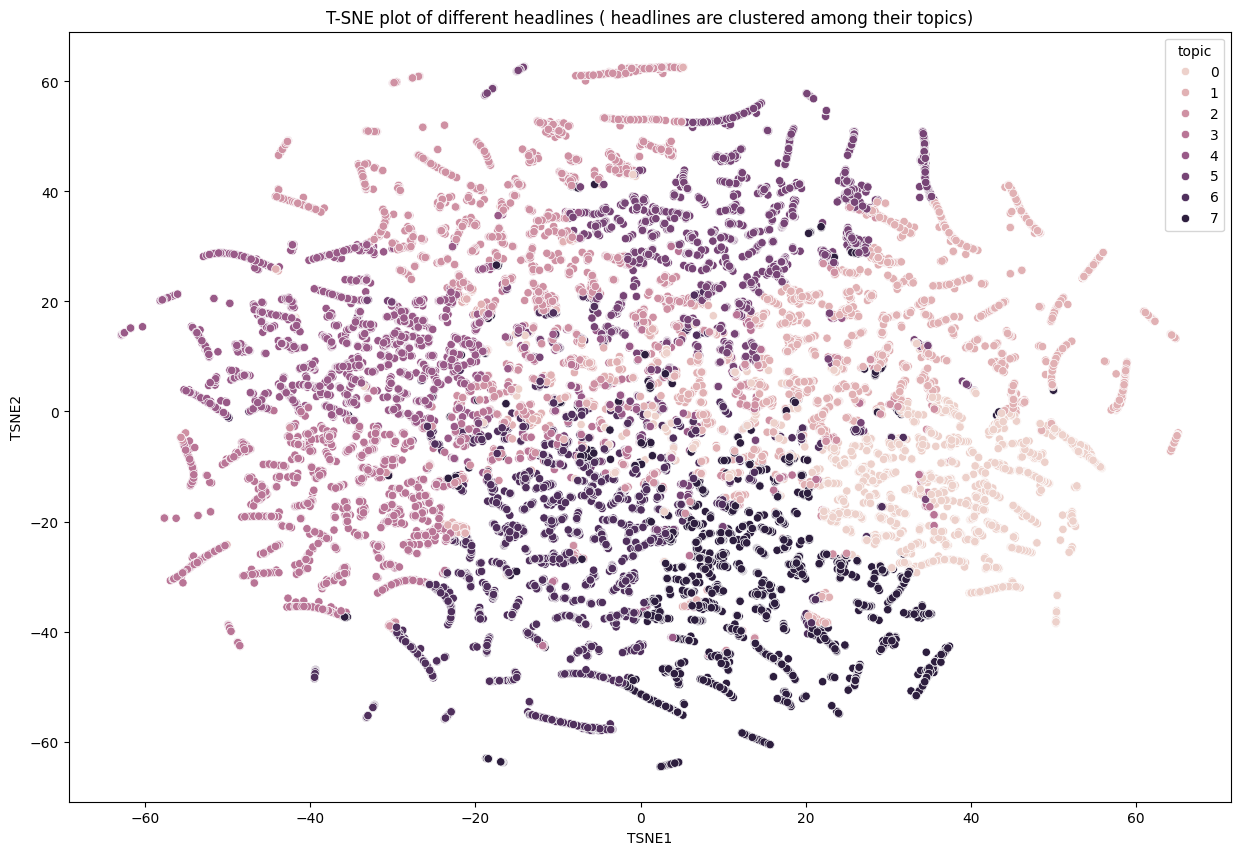

In [18]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()